In [2]:
import pandas as pd
np = pd.np
import matplotlib.pyplot as plt
import importlib
import utils

In [3]:
importlib.reload(utils)

<module 'utils' from '/home/shivar/Research/pollution/epod-nyu-delhi-pollution/utils.py'>

In [4]:
suffix = '2019_Feb_28'
df1 = pd.read_csv('data/kaiterra_fieldeggid_15min_{}_panel.csv'.format(suffix), index_col=[0,1], parse_dates=True)
df1.sort_index(inplace=True)
df2 = pd.read_csv('data/govdata/govdata_15min_panel.csv', index_col=[0,1], parse_dates=True)
df2.sort_index(inplace=True)

In [5]:
print(df1.index.levels[0])
print(df1.columns)

Index(['113E', '1FD7', '20CA', '2E9C', '3ACF', '498F', '4BE7', '56C3', '5D7A',
       '603A', '72CA', '8E2A', '91B8', '97D7', 'A838', 'A9BE', 'BB4A', 'BC46',
       'BFDC', 'C0A7', 'CBC7', 'D804', 'DF07', 'E1F8', 'E47A', 'E486', 'E8E4',
       'EAC8'],
      dtype='object', name='field_egg_id')
Index(['latitude', 'longitude', 'location', 'pm25', 'pm10'], dtype='object')


In [6]:
print(df2.index.levels[0])
print(df2.columns)

Index(['AnandVihar_DPCC', 'AshokVihar_DPCC', 'AyaNagar_IMD',
       'BurariCrossing_IMD', 'CRRIMathuraRoad_IMD', 'DKSSR_DPCC', 'DTU_CPCB',
       'DwarkaSector8_DPCC', 'EastArjunNagar_CPCB', 'IGIAirport_IMD',
       'IHBAS_CPCB', 'ITO_CPCB', 'JNS_DPCC', 'Jahangirpuri_DPCC',
       'LodhiRoad_IMD', 'MDCNS_DPCC', 'MandirMarg_DPCC', 'Mundaka_DPCC',
       'NSIT_CPCB', 'NehruNagar_DPCC', 'OkhlaPhase2_DPCC', 'Patparganj_DPCC',
       'PunjabiBagh_DPCC', 'Pusa_DPCC', 'Pusa_IMD', 'RKPuram_DPCC',
       'Rohini_DPCC', 'Shadipur_CPCB', 'Sirifort_CPCB', 'SoniaVihar_DPCC',
       'SriAurobindoMarg_DPCC', 'VivekVihar_DPCC', 'Wazirpur_DPCC'],
      dtype='object', name='monitor_id')
Index(['pm25', 'pm10'], dtype='object')


In [7]:
from kNearestNeighbors import get_latlondict_gov
latlondict = get_latlondict_gov()
for mid in df1.index.levels[0]:
    latlondict[mid] = (df1.loc[mid].latitude[0], df1.loc[mid].longitude[0])

In [8]:
latlondict

{'AnandVihar_DPCC': (28.646835, 77.31603199999999),
 'AshokVihar_DPCC': (28.695381, 77.181665),
 'AyaNagar_IMD': (28.4706914, 77.10993640000001),
 'BurariCrossing_IMD': (28.725650399999996, 77.20115729999999),
 'CRRIMathuraRoad_IMD': (28.5512005, 77.27357370000001),
 'DKSSR_DPCC': (28.498571000000002, 77.26484),
 'DTU_CPCB': (28.7500499, 77.1112615),
 'DwarkaSector8_DPCC': (28.5710274, 77.07190059999999),
 'EastArjunNagar_CPCB': (28.6556017, 77.2859318),
 'IGIAirport_IMD': (28.562776300000003, 77.1180053),
 'IHBAS_CPCB': (28.681173600000005, 77.30252340000001),
 'ITO_CPCB': (28.631694500000002, 77.2494387),
 'JNS_DPCC': (28.58028, 77.233829),
 'Jahangirpuri_DPCC': (28.73282, 77.170633),
 'LodhiRoad_IMD': (28.5918245, 77.2273074),
 'MDCNS_DPCC': (28.611280999999998, 77.23773800000001),
 'MandirMarg_DPCC': (28.636428999999996, 77.20106700000001),
 'Mundaka_DPCC': (28.684678, 77.076574),
 'NSIT_CPCB': (28.609090000000002, 77.03254129999999),
 'NehruNagar_DPCC': (28.567890000000002, 77.250

In [9]:
df1.drop(['latitude', 'longitude', 'location'], axis='columns', inplace=True)
df = pd.concat([df1, df2], sort=False, copy=False)

In [10]:
# # compute correlation vs. distance - this helps identify interesting pairs of sensors

# from geopy import distance
# from itertools import combinations

# res_list = []

# for mid1, mid2 in combinations(latlondict.keys(), 2):
#     dist = distance.distance(latlondict[mid1], latlondict[mid2]).meters
#     corr, npts = utils.nancorrcoef(df.loc[mid1].pm25.values, df.loc[mid2].pm25.values)
#     res_list.append((mid1, mid2, dist, corr, npts))

# print(len(res_list))
# corrdf = pd.DataFrame(data=res_list, columns=['Monitor_ID_1', 'Monitor_ID_2', 'Distance', 'Correlation', 'Num_points'])
# corrdf.sort_values(['Distance', 'Correlation'], ascending=[True, False], inplace=True)
# corrdf.to_csv('correlations.csv', index=False)

In [11]:
corrdf = pd.read_csv('correlations.csv')

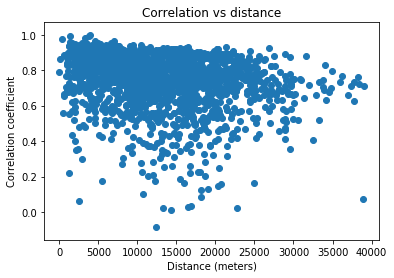

In [12]:
plt.figure()
#dists_list = np.asarray([tup[2] for tup in res_list])
dists_list = corrdf.Distance
#corrs_list = np.asarray([tup[3] for tup in res_list])
corrs_list = corrdf.Correlation
plt.scatter(dists_list, corrs_list)
plt.title('Correlation vs distance')
plt.xlabel('Distance (meters)')
plt.ylabel('Correlation coefficient')
plt.savefig('corr_dist.png')
plt.show()

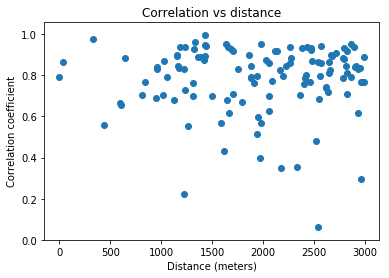

In [13]:
cutoff = 3000
sel = (dists_list < cutoff)
x = dists_list[sel]
y = corrs_list[sel]
plt.scatter(x, y)
plt.title('Correlation vs distance')
plt.xlabel('Distance (meters)')
plt.ylabel('Correlation coefficient')
plt.savefig('corr_dist_lt{}.png'.format(cutoff))
plt.show()

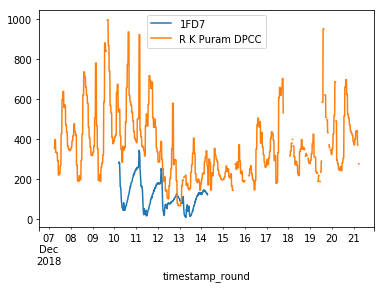

In [14]:
# sample studies of sensors close by but with low correlation
plt.figure()
s = 27000
e = s + 1344
df1.loc['1FD7'].pm25.iloc[s:e].plot(ax=plt.gca(), label='1FD7')
df2.loc['RKPuram_DPCC'].pm25.iloc[s:e].plot(ax=plt.gca(), label='R K Puram DPCC')
plt.legend()
plt.show()

In [16]:
# for every pair of sensors with dist < 3 km and correlation < 0.6, 
# plot time series for each sensor for each day when readings from both 
# sensors are available

import os

plt.rc('font', size=28)

monitorids_shortlist = set()
for row in corrdf.itertuples():
    if row.Distance <= 3000 and row.Correlation <= 0.6:
        mid1, mid2 = row.Monitor_ID_1, row.Monitor_ID_2
        
        monitorids_shortlist.add(mid1)
        monitorids_shortlist.add(mid2)
        series1 = df1.loc[mid1].pm25 if mid1 in df1.index else df2.loc[mid1].pm25
        series2 = df1.loc[mid2].pm25 if mid2 in df1.index else df2.loc[mid2].pm25
        mean1 = np.nanmean(series1.values)
        mean2 = np.nanmean(series2.values)
        meandiff = np.nanmean(np.abs(series1.values - series2.values))
        
        print(row.Index, mid1, mid2, '{:.2f}'.format(mean1), '{:.2f}'.format(mean2), '{:.2f}'.format(meandiff))
        
        savedir = 'plots/{}__{}/pm25/'.format(mid1, mid2)
        if not os.path.exists(savedir):
            os.makedirs(savedir)
        
        for dayno in range(365):
            series1_day = series1.iloc[dayno*96:(dayno+1)*96].copy(deep=True)
            series2_day = series2.iloc[dayno*96:(dayno+1)*96].copy(deep=True)
            
            ts = series1_day.index[0]
            
            # remove outliers
            if not np.isnan(series1_day.values).all() and not np.isnan(series2_day.values).all():
                mean1_day = np.nanmean(series1_day)
                std1_day = np.nanstd(series1_day)
                outlierlocs1 = ((series1_day > (mean1_day + 3*std1_day)) | (series1_day < (mean1_day - 3*std1_day)))
                series1_day[outlierlocs1] = np.nan
                mean2_day = np.nanmean(series2_day)
                std2_day = np.nanstd(series2_day)
                outlierlocs2 = ((series2_day > (mean2_day + 3*std2_day)) | (series2_day < (mean2_day - 3*std2_day)))
                series2_day[outlierlocs2] = np.nan
            
                corr_day, npts_day = utils.nancorrcoef(series1_day.values, series2_day.values)
                if npts_day > 0:
                    mean1_day = np.nanmean(series1_day)
                    mean2_day = np.nanmean(series2_day)
                    meandiff = np.nanmean(np.abs(series1_day.values - series2_day.values))
                    fig = plt.figure(figsize=(16,12))
                    ax = fig.add_subplot(111)
                    series1_day.plot(ax=ax, label='{} (inv={})'.format(mid1, sum(outlierlocs1)))
                    series2_day.plot(ax=ax, label='{} (inv={})'.format(mid2, sum(outlierlocs2)))
                    ax.legend(ncol=2, fontsize='x-small')
                    ax.set_xlabel('Time')
                    ax.set_ylabel(r'$PM_{2.5}$ conc ($\mu g/m^3$)')
                    ax.set_title(r'{} & {}, {}, {}, corr={:.2f}, diff={:.2f} $\mu g/m^3$, dist={:.2f} m'.format(mid1, mid2, ts.strftime('%Y-%m-%d'), ts.day_name(), corr_day, meandiff, row.Distance),
                                fontsize='x-small')
                    fig.savefig(os.path.join(savedir, ts.strftime('%Y%m%d') + '_pm25.png'))
                    plt.close(fig)
                    series1_day.name = mid1
                    series2_day.name = mid2
                    df_day = pd.concat([series1_day, series2_day], axis=1)
                    df_day.to_csv(os.path.join(savedir, ts.strftime('%Y%m%d') + '_pm25.csv'))

plt.rcdefaults()

3 RKPuram_DPCC 1FD7 160.60 110.21 57.45


/opt/anaconda3/envs/root3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/anaconda3/envs/root3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/opt/anaconda3/envs/root3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


24 Sirifort_CPCB E47A 106.48 76.64 32.37


/opt/anaconda3/envs/root3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/envs/root3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


27 AyaNagar_IMD 8E2A 129.84 158.60 80.78


/opt/anaconda3/envs/root3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/envs/root3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


40 IHBAS_CPCB VivekVihar_DPCC 80.48 171.63 37.49
41 AyaNagar_IMD 5D7A 129.84 53.51 38.09
56 Sirifort_CPCB 3ACF 106.48 44.60 17.38


/opt/anaconda3/envs/root3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/envs/root3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


58 Sirifort_CPCB 4BE7 106.48 124.60 45.14
59 Sirifort_CPCB 498F 106.48 68.32 25.76


/opt/anaconda3/envs/root3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/anaconda3/envs/root3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/opt/anaconda3/envs/root3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


61 NehruNagar_DPCC 498F 167.41 68.32 32.39
72 3ACF BB4A 44.60 123.99 34.80
78 5D7A 8E2A 53.51 158.60 72.42


/opt/anaconda3/envs/root3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/anaconda3/envs/root3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/opt/anaconda3/envs/root3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


89 2E9C E47A 135.39 76.64 30.75
92 498F 56C3 68.32 189.60 48.86
125 PunjabiBagh_DPCC Shadipur_CPCB 167.08 85.65 43.75


In [21]:
print(sorted(monitorids_shortlist))
with open('anomalies_monitors.txt', 'w') as fout:
    fout.write(os.linesep.join(sorted(monitorids_shortlist)))

['1FD7', '2E9C', '3ACF', '498F', '4BE7', '56C3', '5D7A', '8E2A', 'AyaNagar_IMD', 'BB4A', 'E47A', 'IHBAS_CPCB', 'NehruNagar_DPCC', 'PunjabiBagh_DPCC', 'RKPuram_DPCC', 'Shadipur_CPCB', 'Sirifort_CPCB', 'VivekVihar_DPCC']


In [22]:
# for each of the shortlisted monitors, extract longest
# contiguous portion, smoothen it and apply fourier transform
# to extract the frequency components

for mid in monitorids_shortlist:
    series = df1.loc[mid].pm25 if mid in df1.index else df2.loc[mid].pm25
    arr = utils.extract_contiguous([series.values]).squeeze()
    np.fft

In [4]:
# (1) correlations between sensors of same type situated very close by
# df1.loc[['603A', 'CBC7']]
mat = utils.extract_contiguous([df1.loc['603A'].pm25.values, df1.loc['CBC7'].pm25.values])
print(mat.shape[0])
print(np.corrcoef(mat[:,0], mat[:,1]))

2111
[[1.        0.8754422]
 [0.8754422 1.       ]]


In [5]:
# (2) fourier transforms

def plot_dft(xt, d=1.0):
    xf = np.fft.fft(xt)
    freqs = np.fft.fftfreq(xt.size, d)
    plt.figure(figsize=(12,12))
    plt.subplot(211)
    plt.plot(freqs, xf.real)
    plt.title('Freq component magnitudes')
    plt.subplot(212)
    plt.plot(freqs, xf.imag)
    plt.title('Freq component phases')
    plt.show()

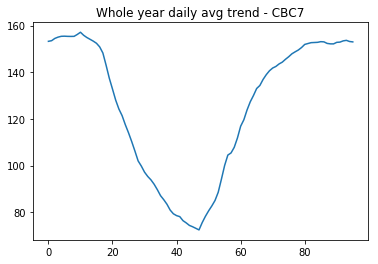

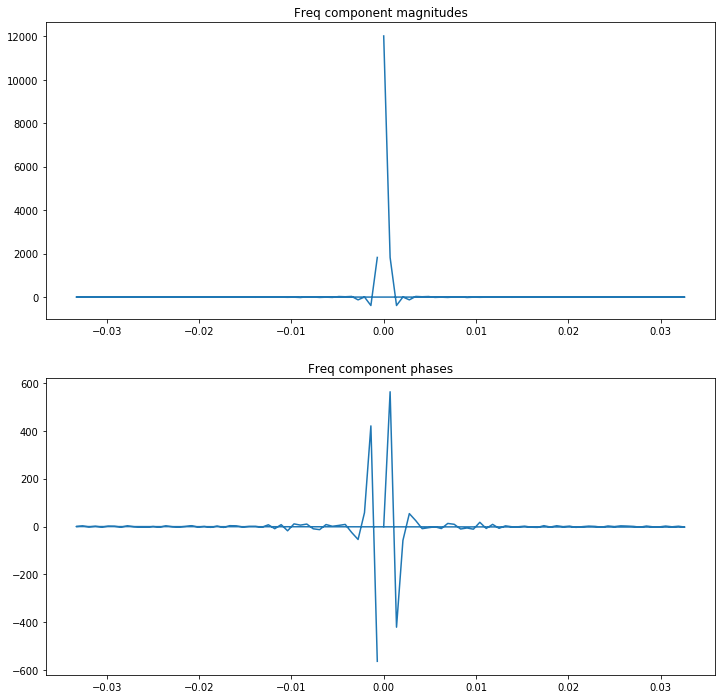

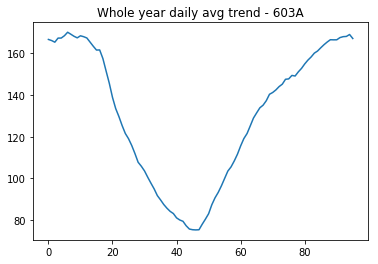

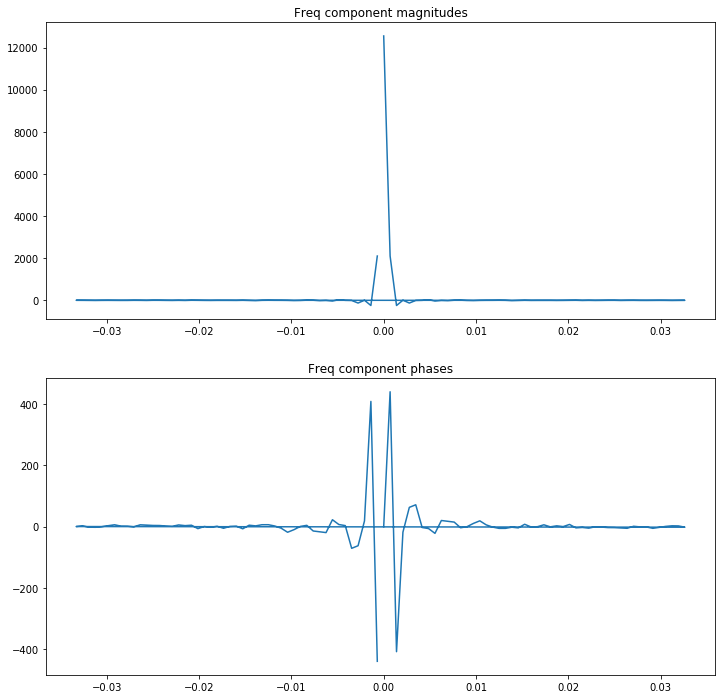

In [6]:
mids_list = ['CBC7', '603A']

for mid in mids_list:
    arr = df1.loc[mid].pm25.values.reshape(-1, 96)
    arr_avg = np.nanmean(arr, axis=0)
    plt.plot(arr_avg)
    plt.title('Whole year daily avg trend - {}'.format(mid))
    plot_dft(arr_avg, 15)

In [7]:
print(df1.index.levels[0])
print(df1.columns)

Index(['113E', '1FD7', '20CA', '2E9C', '3ACF', '498F', '4BE7', '56C3', '5D7A',
       '603A', '72CA', '8E2A', '91B8', '97D7', 'A838', 'A9BE', 'BB4A', 'BC46',
       'BFDC', 'C0A7', 'CBC7', 'D804', 'DF07', 'E1F8', 'E47A', 'E486', 'E8E4',
       'EAC8'],
      dtype='object', name='field_egg_id')
Index(['latitude', 'longitude', 'location', 'pm25', 'pm10'], dtype='object')


In [8]:
print(df2.index.levels[0])
print(df2.columns)

Index(['AnandVihar_DPCC', 'AshokVihar_DPCC', 'AyaNagar_IMD',
       'BurariCrossing_IMD', 'CRRIMathuraRoad_IMD', 'DKSSR_DPCC', 'DTU_CPCB',
       'DwarkaSector8_DPCC', 'EastArjunNagar_CPCB', 'IGIAirport_IMD',
       'IHBAS_CPCB', 'ITO_CPCB', 'JNS_DPCC', 'Jahangirpuri_DPCC',
       'LodhiRoad_IMD', 'MDCNS_DPCC', 'MandirMarg_DPCC', 'Mundaka_DPCC',
       'NSIT_CPCB', 'NehruNagar_DPCC', 'OkhlaPhase2_DPCC', 'Patparganj_DPCC',
       'PunjabiBagh_DPCC', 'Pusa_DPCC', 'Pusa_IMD', 'RKPuram_DPCC',
       'Rohini_DPCC', 'Shadipur_CPCB', 'Sirifort_CPCB', 'SoniaVihar_DPCC',
       'SriAurobindoMarg_DPCC', 'VivekVihar_DPCC', 'Wazirpur_DPCC'],
      dtype='object', name='monitor_id')
Index(['pm25', 'pm10'], dtype='object')


In [9]:
print(df1.index.levels[1])
print(df1.index.levels[1].size / 96)

DatetimeIndex(['2018-03-01 00:00:00', '2018-03-01 00:15:00',
               '2018-03-01 00:30:00', '2018-03-01 00:45:00',
               '2018-03-01 01:00:00', '2018-03-01 01:15:00',
               '2018-03-01 01:30:00', '2018-03-01 01:45:00',
               '2018-03-01 02:00:00', '2018-03-01 02:15:00',
               ...
               '2019-02-28 21:30:00', '2019-02-28 21:45:00',
               '2019-02-28 22:00:00', '2019-02-28 22:15:00',
               '2019-02-28 22:30:00', '2019-02-28 22:45:00',
               '2019-02-28 23:00:00', '2019-02-28 23:15:00',
               '2019-02-28 23:30:00', '2019-02-28 23:45:00'],
              dtype='datetime64[ns]', name='timestamp_round', length=35040, freq=None)
365.0


In [10]:
print(df1.index.levels[1].month)
print(df1.index.levels[1].week)
print(df1.index.levels[1].weekofyear)
print(np.any(df1.index.levels[1].weekofyear - df1.index.levels[1].week))

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
           dtype='int64', name='timestamp_round', length=35040)
Int64Index([9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
            ...
            9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
           dtype='int64', name='timestamp_round', length=35040)
Int64Index([9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
            ...
            9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
           dtype='int64', name='timestamp_round', length=35040)
False


In [17]:
# compute average at each 15 min instance across 7 days in a week.

import os
from tqdm import tqdm
from scipy import interpolate

# first for our sensors
savedir = 'figures/kaiterra/week_avgday/'
if not os.path.exists(savedir):
    os.makedirs(savedir)

INT = 7*96
END = 52*7*96

index = np.arange(1,97)

for count, monitorid in enumerate(df1.index.levels[0]):
    print(count, monitorid)
    mat_weekly = np.empty((52, 96))
    
    for start in tqdm(range(0, END, INT)):
        yt = df1.loc[monitorid].iloc[start:start+INT].pm25.values
        yt_avg = np.nanmean(yt.reshape(7,96), axis=0)
        weeknum = start//INT + 1
        mat_weekly[weeknum-1,:] = yt_avg
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.plot(index, yt_avg, 'k.')
        
        # interpolate if more than cutoff valid values
        nanlocs = np.isnan(yt_avg)
        nvalid = sum(~nanlocs) / 96.0
        if nvalid < 1 and nvalid >= 0.8:
            x = np.where(~nanlocs)[0] + 1
            y = yt_avg[x-1]
            f = interpolate.PchipInterpolator(x, y)
            yt_avg_int = f(index)
            ax.plot(index, yt_avg_int, 'rx')
        
        ax.set_title('Monitor: {}, Week: {}'.format(monitorid, weeknum))
        ax.set_xlabel('Time (15 min)')
        ax.set_ylabel(r'PM$_{2.5}$ conc ($\mu g/m^3$)')
        fig.savefig(savedir + 'avg_{}_{:02d}.png'.format(monitorid, weeknum))
        plt.close(fig)
        
    np.savetxt(savedir + 'avg_{}.txt'.format(monitorid), mat_weekly, fmt='%f', delimiter=',')

  4%|▍         | 2/52 [00:00<00:02, 19.36it/s]

0 113E


  6%|▌         | 3/52 [00:00<00:02, 23.20it/s]

1 1FD7


  6%|▌         | 3/52 [00:00<00:02, 23.65it/s]

2 20CA


  6%|▌         | 3/52 [00:00<00:02, 23.40it/s]

3 2E9C


  6%|▌         | 3/52 [00:00<00:02, 21.33it/s]

4 3ACF


  6%|▌         | 3/52 [00:00<00:02, 20.05it/s]

5 498F


  6%|▌         | 3/52 [00:00<00:02, 23.31it/s]

6 4BE7


  6%|▌         | 3/52 [00:00<00:02, 23.40it/s]

7 56C3


  6%|▌         | 3/52 [00:00<00:02, 21.27it/s]

8 5D7A


  6%|▌         | 3/52 [00:00<00:02, 23.22it/s]

9 603A


  6%|▌         | 3/52 [00:00<00:02, 23.05it/s]

10 72CA


  0%|          | 0/52 [00:00<?, ?it/s]

11 8E2A


  6%|▌         | 3/52 [00:00<00:02, 23.09it/s]

12 91B8


  6%|▌         | 3/52 [00:00<00:02, 23.20it/s]

13 97D7


  6%|▌         | 3/52 [00:00<00:02, 23.01it/s]

14 A838


  6%|▌         | 3/52 [00:00<00:02, 23.23it/s]

15 A9BE


  6%|▌         | 3/52 [00:00<00:02, 23.38it/s]

16 BB4A


  6%|▌         | 3/52 [00:00<00:02, 23.60it/s]

17 BC46


  6%|▌         | 3/52 [00:00<00:02, 23.72it/s]

18 BFDC


  6%|▌         | 3/52 [00:00<00:02, 23.13it/s]

19 C0A7


  6%|▌         | 3/52 [00:00<00:02, 21.16it/s]

20 CBC7


  6%|▌         | 3/52 [00:00<00:02, 23.27it/s]

21 D804


  6%|▌         | 3/52 [00:00<00:02, 23.31it/s]

22 DF07


  6%|▌         | 3/52 [00:00<00:02, 23.38it/s]

23 E1F8


  6%|▌         | 3/52 [00:00<00:02, 23.60it/s]

24 E47A


  6%|▌         | 3/52 [00:00<00:02, 23.12it/s]

25 E486


  6%|▌         | 3/52 [00:00<00:02, 23.18it/s]

26 E8E4


  6%|▌         | 3/52 [00:00<00:02, 23.21it/s]

27 EAC8


100%|██████████| 52/52 [00:02<00:00, 22.15it/s]


In [ ]:
# compute average at each 15 min instance across each weekday for a month

In [ ]:
# do fourier analysis on a weekly basis for each sensor

        